# Mexico vs Poland 2022 World Cup Analysis

On this notebook we will be analyzing Mexico's performance againts Poland in the first game of the group stage at the 2022 FIFA World Cup

This is analysis was made by [@MauricioSoria](https://www.linkedin.com/in/mauricio-soria1/)

With special help of [@MPLSoccer](https://mplsoccer.readthedocs.io/en/latest/index.html) with the code, and [@StatsBomb](https://statsbomb.com/es/noticias/datos-gratuitos-la-copa-mundial-2022-con-statsbomb-360/l) who shared the open data

In [1]:
from statsbombpy import sb

In [2]:
import math
from urllib.request import urlopen

import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import VerticalPitch, Sbopen, FontManager, inset_image

# data parser, fonts and path effects for giving the font an edge
parser = Sbopen()
roboto_bold = FontManager(
    'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

# First Half Analysis

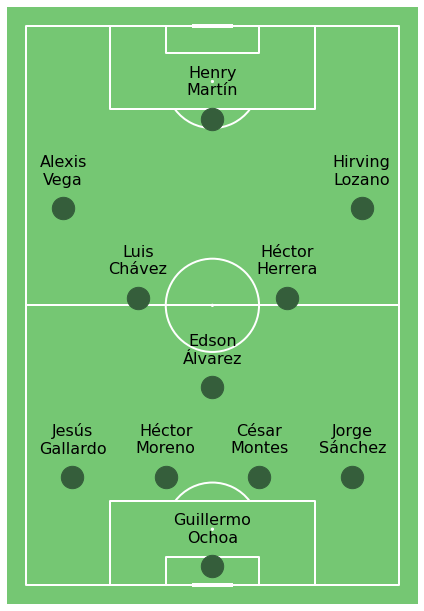

In [3]:
eventFull, related, freeze, tactics = parser.event(3857265)
mexicoXIP = sb.lineups(match_id=3857265)["Mexico"]
mexicoXIP['player_nickname'] = mexicoXIP.apply(lambda x: x["player_name"] if x['player_nickname']== None else x['player_nickname'], axis=1)
# starting players from Argentina
starting_xi_event = eventFull.loc[((eventFull['type_name'] == 'Starting XI') &
                               (eventFull['team_name'] == 'Mexico')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
# filter only succesful ball receipts from the starting XI
event = eventFull.loc[((eventFull['type_name'] == 'Ball Receipt') &
                   (eventFull['outcome_name'].isnull()) &
                   (eventFull["minute"]<46) &
                   (eventFull['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
starting_xi['player_name'] = starting_xi['player_name'].map(mexicoXIP.set_index('player_name')['player_nickname'])
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

pitch = VerticalPitch(pitch_color='#75c773', line_color='white')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text', c = "black",
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)

# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='#355E3B', s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

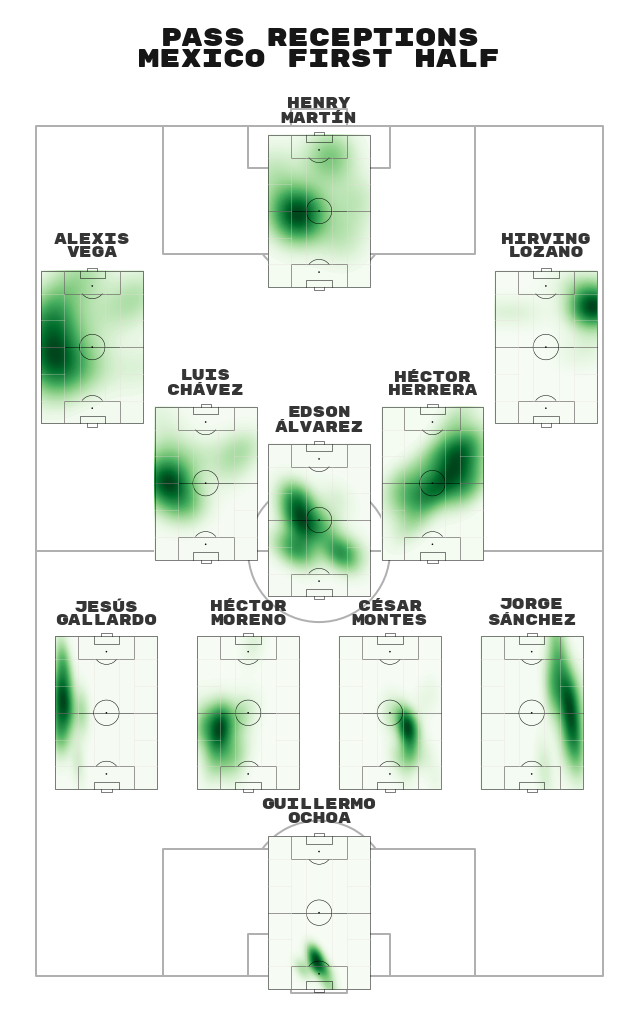

In [4]:
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14, grid_width=0.9,
                      grid_height=0.9, axis=False)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')
title = axs['title'].text(0.5, 0.5, 'Pass receptions\nMexico First Half', fontsize=25,
                          va='center',
                          ha='center', color='#161616', fontproperties=fm_rubik.prop)

pitch_ax = pitch.formation(formation,
                           kind='pitch',
                           # avoid overlapping pitches with offsets
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           # pitch is 23 units long (could also set the height).
                           # note this is set assuming the pitch is horizontal, but in this example
                           # it is vertical so that you get the same results
                           # from both VerticalPitch and Pitch
                           width=23,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           # additional arguments temporarily amend the pitch appearance
                           # note we are plotting a really faint positional grid
                           # that overlays the kdeplot
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3,
                           )

# adding kdeplot and player titles
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=event.loc[event['position_id'] == position, 'x'],
                  y=event.loc[event['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Greens', thresh=0, ax=pitch_ax[position])

### Mexico's Formation Analysis

Mexico started with a 433 Holding, in which Edson Álvarez worked in that CDM role but had tendencies to open up to the left instead of dropping down as other CDMs do to receive the ball. One important aspect we can see in the first half is the dominance on the left hand side, as Henry and Edson preferred receieving the ball on that side. Another key aspect that we can see and feel throughout the game is the lack of involvement of Herrera throughout the first half. As we can see he tends to received the ball behind the line of Polish midfielders which can be difficult as he is hidden at times. Also, we can see how Chávez tends to start as close to the sideline as possible. This was seen as a problem for Mexico since the midfield was to spread over the field and the link up was problematic at times. As we can see Vega, Gallardo and Chavez all clashed at the sideline since they tend to all be in those zones. As for the right hand side Chucky and Jorge understood their role correcltly as Jorge went inside as Chucky opened up, this generated some chances in the first half. As for Henry his task for the First Half was to drop down and receive the ball close the the half which was difficult since the help from the other players was not normally there. As for the CBs, watching the game we could see that they loved to try long passes across the field to the wingers, which in theory was a good effort, but actually they did not create that many opportunities.

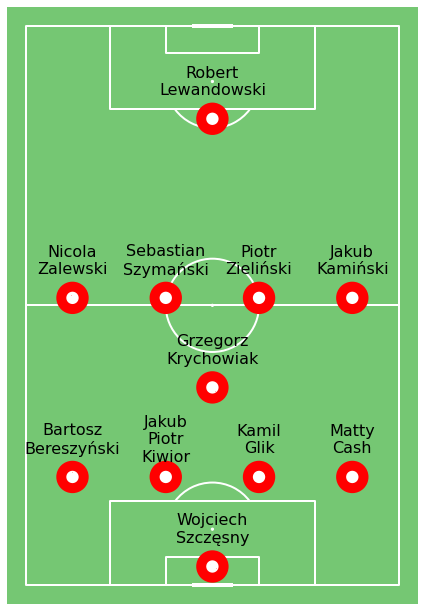

In [56]:
eventFull, related, freeze, tactics = parser.event(3857265)
polandXIP = sb.lineups(match_id=3857265)["Poland"]
polandXIP['player_nickname'] = polandXIP.apply(lambda x: x["player_name"] if x['player_nickname']== None else x['player_nickname'], axis=1)
# starting players from Argentina
starting_xi_event = eventFull.loc[((eventFull['type_name'] == 'Starting XI') &
                               (eventFull['team_name'] == 'Poland')), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
starting_xi = tactics.merge(starting_xi_event, on='id')
# filter only succesful ball receipts from the starting XI
event = eventFull.loc[((eventFull['type_name'] == 'Ball Receipt') &
                   (eventFull['outcome_name'].isnull()) &
                   (eventFull["minute"]<46) &
                   (eventFull['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
starting_xi['player_name'] = starting_xi['player_name'].map(polandXIP.set_index('player_name')['player_nickname'])
# merge on the starting positions to the events
event = event.merge(starting_xi, on='player_id')
formation = event['tactics_formation'].iloc[0]

pitch = VerticalPitch(pitch_color='#75c773', line_color='white')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text', c = "black",
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)


mpl.rcParams['hatch.linewidth'] =20
mpl.rcParams['hatch.color'] = 'white'
ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='red', hatch='o', linewidth=10, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)

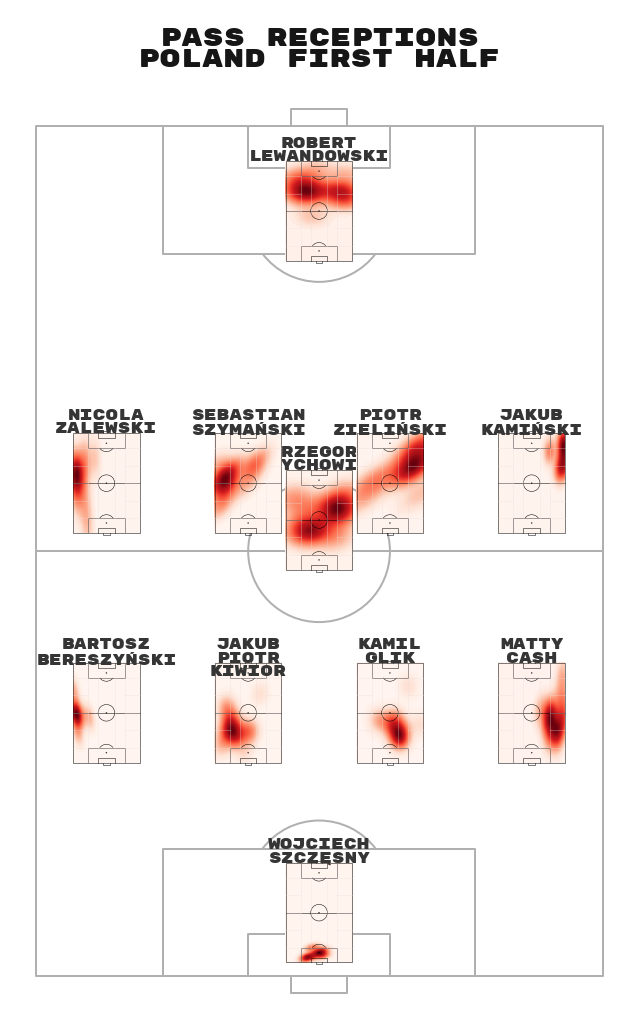

In [30]:
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14, grid_width=0.9,
                      grid_height=0.9, axis=False)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')
title = axs['title'].text(0.5, 0.5, 'Pass receptions\nPoland First Half', fontsize=25,
                          va='center',
                          ha='center', color='#161616', fontproperties=fm_rubik.prop)

pitch_ax = pitch.formation(formation,
                           kind='pitch',
                           # avoid overlapping pitches with offsets
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           # pitch is 23 units long (could also set the height).
                           # note this is set assuming the pitch is horizontal, but in this example
                           # it is vertical so that you get the same results
                           # from both VerticalPitch and Pitch
                           width=15,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           # additional arguments temporarily amend the pitch appearance
                           # note we are plotting a really faint positional grid
                           # that overlays the kdeplot
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3,
                           )

# adding kdeplot and player titles
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15, ax=pitch_ax[position],
               fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=event.loc[event['position_id'] == position, 'x'],
                  y=event.loc[event['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Reds', thresh=0, ax=pitch_ax[position])

### Poland's Formation Analysis

As seen in the formation, the starting formation was a 4141, with Krychowiak holding down the CDM spot, but in reality it was more a 4321 with both Szymanski and Zielinski acting as Attacking Midfielders. They tend to go forward and push more while defending to try to close down gaps and make Mexico distribute the ball backwards. As seen, the instructions for Kaminski and Zalewski were to stay wide, while Kaminski as soon as the ball was won, he went straight forward. This created multiple chances as Gallardo, Mexico's LB, also tends to go forward so they were trying to take advantage of this. As for the rest of the team it was a compact side that tried to interrupt any build up with the forwards but were happy to leave the ball to the opposition's defenders. As seen in the map the participation receiving the ball for certain positions was really low meaning that Mexico did a good job winning back possesion. This could also be seen in the game as Mexico generally defended well. As for Lewandowski, he also tended to drop down but tried receiving the ball at the defensive line for Mexico, with Szymanski helping in the inside and Zielinski opening up to receive while Kaminski pushed forward through the side line. The main goal for Poland during the first half was to counterattack and Mexico defended it well during the first half. Defensively they were though to beat down, Mexico had a few chances, but the structure for Poland generally worked.

### 